### well structured - an ode to databases


# data unterstanding

### import libaries

In [18]:
import sqlite3
import pandas as pd
import numpy as np

### create database and tables

In [19]:
conn = sqlite3.connect('brexit.db')
df = pd.read_csv('economic-growth.csv', delimiter=";")
df.to_sql(name="economic-growth", con=conn,if_exists='replace', index=False)

df = pd.read_csv('migration.csv', delimiter=";")
df.to_sql(name="migration", con=conn,if_exists='replace', index=False)

conn.commit()
conn.close()

### select all from table economic growth

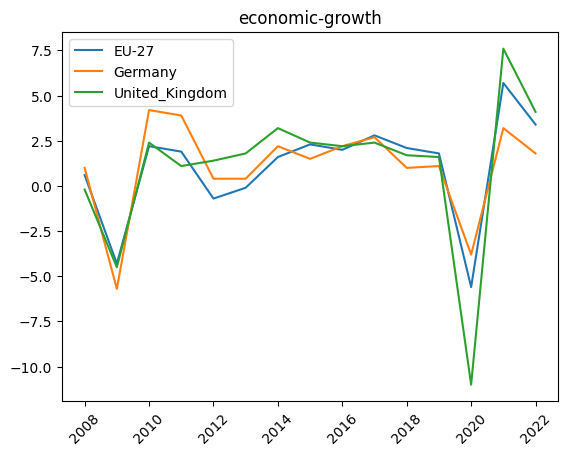

In [20]:
conn = sqlite3.connect('brexit.db')

sql = "SELECT * FROM 'economic-growth'"
result = pd.read_sql(sql,conn)

year = result['Jahr'].tolist()
EU_27 = result['EU-27'].tolist()
Germany = result['Germany'].tolist()
United_Kingdom = result['United Kingdom'].tolist()

df = pd.DataFrame({'EU-27':EU_27, 'Germany': Germany, 'United_Kingdom':United_Kingdom}, index=year)
plot = df.plot(title="economic-growth", rot=45)

<font color='#5891db'> All curves are largely synchronous. They all have low points in 2008 and 2020. Peaks in economic growth are for the EU-27 and the United Kingdom in 2021 and for Germany in 2010.</font>

### select one column from table migration

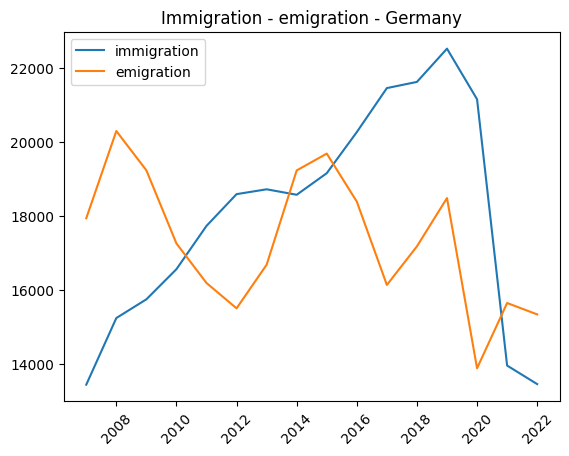

In [21]:
sql = "SELECT Year FROM migration"
result = pd.read_sql(sql,conn)
year = result['Year'].tolist()

sql = "SELECT Immigration FROM migration"
result = pd.read_sql(sql,conn)
immigration = result['Immigration'].tolist()

sql = "SELECT Emigration FROM migration"
result = pd.read_sql(sql,conn)
emigration = result['Emigration'].tolist()


df = pd.DataFrame({'immigration': immigration, 'emigration': emigration}, index=year)
plot = df.plot(title="Immigration - emigration - Germany", rot=45)

<font color='#5891db'>While immigration to Germany is fluctuatingly decreasing, emigration to England will increase until 2020 and then fall sharply.</font>

### select where from table migration

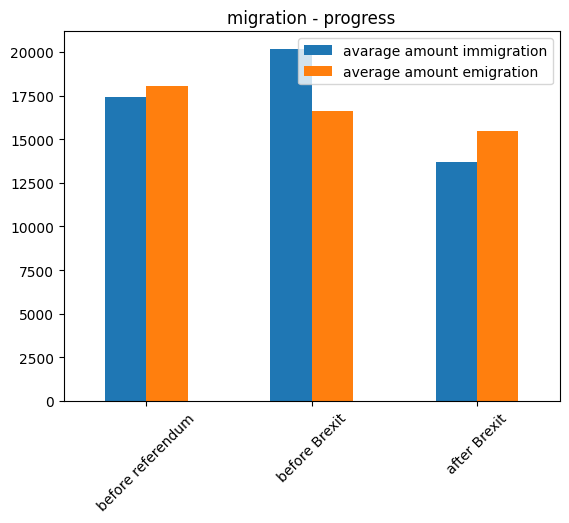

In [22]:
sql = "SELECT AVG(Immigration), AVG(Emigration) FROM migration WHERE Year <= 2016"
result = pd.read_sql(sql,conn)
before_ref_immigration = result['AVG(Immigration)'].loc[0]
before_ref_emigration = result['AVG(Emigration)'].loc[0]

sql = "SELECT AVG(Immigration), AVG(Emigration) FROM migration WHERE Year BETWEEN  2016 AND 2021"
result = pd.read_sql(sql,conn)
before_brex_immigration = result['AVG(Immigration)'].loc[0]
before_brex_emigration = result['AVG(Emigration)'].loc[0]

sql = "SELECT AVG(Immigration), AVG(Emigration) FROM migration WHERE Year > 2020"
result = pd.read_sql(sql,conn)
after_brex_immigration = result['AVG(Immigration)'].loc[0]
after_brex_emigration = result['AVG(Emigration)'].loc[0]

df = pd.DataFrame({'avarage amount immigration' : [before_ref_immigration, before_brex_immigration, after_brex_immigration], 'average amount emigration' : [before_ref_emigration, before_brex_emigration , after_brex_emigration]}, index = ['before referendum', 'before Brexit', 'after Brexit'])
plot = df.plot.bar(title="migration - progress", rot=45)

<font color='#5891db'>Average immigration during the three phases of Brexit decreases, while average emigration peaks after the referendum but before Brexit.</font>

### select where from table economic growth

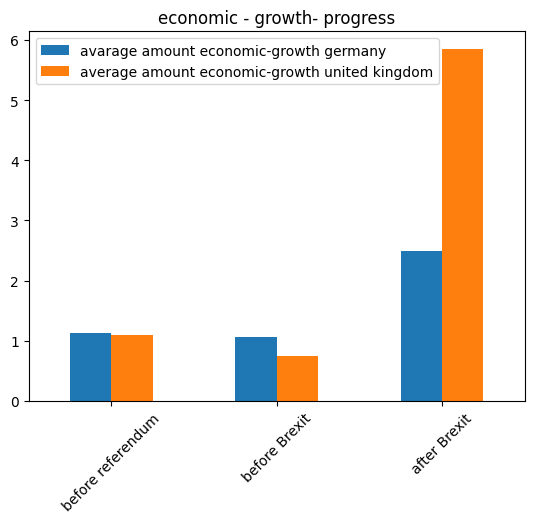

In [23]:
sql = "SELECT AVG(Germany), AVG(`United Kingdom`) FROM 'economic-growth' WHERE Jahr <= 2016"
result = pd.read_sql(sql,conn)
before_ref_economic_growth_germany = result['AVG(Germany)'].loc[0]
before_ref_economic_growth_united_kingdom = result['AVG(`United Kingdom`)'].loc[0]

sql = "SELECT AVG(Germany), AVG(`United Kingdom`) FROM 'economic-growth' WHERE Jahr BETWEEN 2016 AND 2021"
result = pd.read_sql(sql,conn)
before_brex_economic_growth_germany = result['AVG(Germany)'].loc[0]
before_brex_economic_growth_united_kingdom= result['AVG(`United Kingdom`)'].loc[0]

sql = "SELECT AVG(Germany), AVG(`United Kingdom`) FROM 'economic-growth' WHERE Jahr > 2020"
result = pd.read_sql(sql,conn)
after_brex_economic_growth_germany = result['AVG(Germany)'].loc[0]
after_brex_economic_growth_united_kingdom = result['AVG(`United Kingdom`)'].loc[0]

df = pd.DataFrame({'avarage amount economic-growth germany ' : [before_ref_economic_growth_germany, before_brex_economic_growth_germany, after_brex_economic_growth_germany], 'average amount economic-growth united kingdom' : [before_ref_economic_growth_united_kingdom, before_brex_economic_growth_united_kingdom , after_brex_economic_growth_united_kingdom]}, index = ['before referendum', 'before Brexit', 'after Brexit'])
plot = df.plot.bar(title="economic - growth- progress", rot=45)

### display missing data

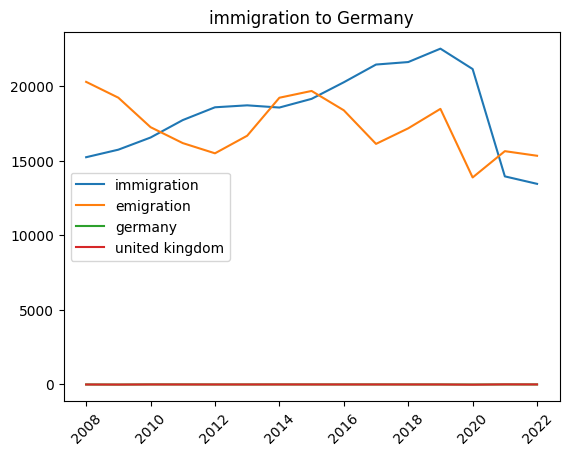

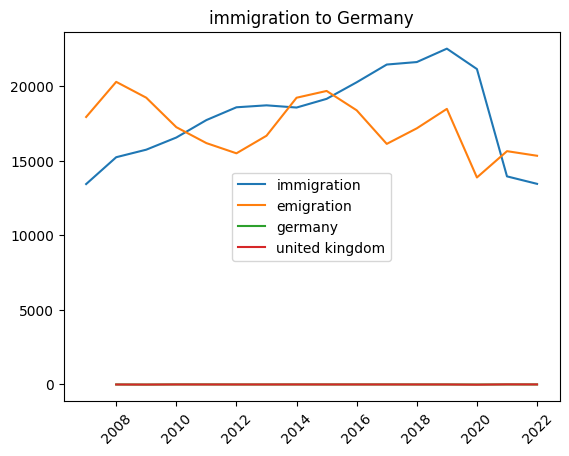

In [24]:
conn = sqlite3.connect('brexit.db')

# LEFT (OUTER) JOIN
sql = "SELECT migration.Year, migration.Immigration, migration.Emigration, `economic-growth`.Germany, `economic-growth`.`United Kingdom` FROM `economic-growth` LEFT JOIN migration ON migration.Year = `economic-growth`.Jahr ORDER BY migration.Year"
result = pd.read_sql(sql,conn)

year = result['Year'].tolist()
immigration = result['Immigration'].tolist()
emigration = result['Emigration'].tolist()

germany = result['Germany'].tolist()
germany = [np.NaN if x=='NaN' else x for x in germany]
united_kingdom = result['United Kingdom'].tolist()
united_kingdom = [np.NaN if x=='NaN' else x for x in united_kingdom]

df = pd.DataFrame({'immigration': immigration, 'emigration': emigration, 'germany': germany, 'united kingdom': united_kingdom}, index=year)
plot = df.plot(title="immigration to Germany", rot=45)


# RIGHT (OUTER) JOIN
sql = "SELECT migration.Year, migration.Immigration, migration.Emigration, `economic-growth`.Germany, `economic-growth`.`United Kingdom` FROM `economic-growth` RIGHT JOIN migration ON migration.Year = `economic-growth`.Jahr ORDER BY migration.Year"
result = pd.read_sql(sql,conn)

year = result['Year'].tolist()
immigration = result['Immigration'].tolist()
emigration = result['Emigration'].tolist()

germany = result['Germany'].tolist()
germany = [np.NaN if x=='NaN' else x for x in germany]
united_kingdom = result['United Kingdom'].tolist()
united_kingdom = [np.NaN if x=='NaN' else x for x in united_kingdom]

df = pd.DataFrame({'immigration': immigration, 'emigration': emigration, 'germany': germany, 'united kingdom': united_kingdom}, index=year)
plot = df.plot(title="immigration to Germany", rot=45)

conn.close()

#  <font color='#bd1c3f'>LINEAR REGRESSION</font> <br>These questions arise

## 1. Migration- Time

<font>1.1 Is there a linear temporal connection regarding  <br>immigration/emigration to Germany concerning United Kingdom<br> before the referendum, before brexit, after brexit?</font> 

## 2. Economic-Growth - Time

<font>2.1  Is there a linear temporal connection regarding  <br>Economic Growth in Germany and United Kingdom<br> before the referendum, before brexit, after brexit?</font> 

#  <font color='#bd1c3f'>HOW WOULD IMMIGRATION, EMIGRATION, <br>ECONOMIC GROWTH GERMANY AND <br>ECONOMIC GROWTH UNITED KINGDOM HAVE<br> LOOKED HAD BREXIT NOT HAPPENED?</font> 